# Statistique Descriptive Univariée

**Librairies**

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Vocabulaire des statistiques

Soit un ensemble 

$$
\Omega = \{ \omega_1, \omega_2, \ldots, \omega_n \}
$$

- Cet ensemble constitue une **population**, et chaque élément ( $\omega_i$ ) est appelé un **individu**.
- Un **sous-ensemble** de ($ \Omega $) est appelé une **sous-population**.
- Le **cardinal** ( $n$ ) de ($ \Omega $) représente l’**effectif de la population**.
- Un **caractère** est une **application** ( $ X $ ) définie sur ($ \Omega $).
    - Si ( $ X $ ) prend des **valeurs réelles**, c’est un **caractère quantitatif**.
    - Sinon, c’est un **caractère qualitatif**.
    - Ici, on se limite aux **caractères quantitatifs**.
- La **série statistique** est la suite des valeurs prises par ( $X$ ), notée :

$$
X = [x_1, x_2, \ldots, x_n] \quad \text{où } x_i = X(\omega_i)
$$

- **L’étendue** d’une série statistique est la différence entre la plus grande et la plus petite valeur observée :  

$$
\text{Étendue} = \max(x_i) - \min(x_i)
$$



### Exemple

On s'intéresse aux notes obtenues par les élèves d'une classe de 4ᵉ lors du dernier contrôle de mathématiques.

- **Population** : l'ensemble des élèves de la classe.  
  On note cet ensemble :  
  $$
  \Omega = \{ \omega_1, \omega_2, \ldots, \omega_{28} \}
  $$

- **Individu** : un élève particulier, par exemple ( $\omega_5$ )

- **Caractère étudié** : la note en mathématiques  
  Le caractère est une application :  
  $$
  X : \Omega \to \mathbb{R}, \quad X(\omega_i) = \text{note de } \omega_i
  $$

- **Série statistique** (exemple) :  
  $$
  X = [12, 15, 8, 17, 10, \ldots, 14]
  $$

- **Type de caractère** :  
  Le caractère ( $X$ ) est **quantitatif**, car les notes sont des valeurs numériques.

- **Étendue de la série** :  
  $$
  \text{Étendue} = 17 - 8 = 9
  $$

In [130]:
notes = np.array([12, 15, 8, 17, 10, 14])

# Étendue
etendue = np.max(notes) - np.min(notes)

print("Notes :", notes)
print("Étendue :", etendue)

Notes : [12 15  8 17 10 14]
Étendue : 9


In [131]:
notes = pd.Series([12, 15, 8, 17, 10, 14])

# Étendue = max - min
etendue = notes.max() - notes.min()

# Affichage
print("Notes :", notes.to_list())
print("Étendue :", etendue)

Notes : [12, 15, 8, 17, 10, 14]
Étendue : 9


### Médiane

La **médiane** est une valeur $m$ qui partage la population $\Omega$ en deux sous-populations de même effectif :

- $\Omega^- = \{ \omega \in \Omega \mid X(\omega) < m \}$
- $\Omega^+ = \{ \omega \in \Omega \mid X(\omega) > m \}$

Cependant, une telle valeur $m$ n'existe pas toujours ou n’est pas toujours unique. On adopte alors la **convention suivante** :

- Si $n$ est **pair**, on a $n = 2N$, et les données triées vérifient :

$$
x_1 \leq x_2 \leq \cdots \leq x_N \leq x_{N+1} \leq \cdots \leq x_{2N}
$$

On définit alors la médiane par :

$$
m = \frac{x_N + x_{N+1}}{2}
$$

- Si $n$ est **impair**, on a $n = 2N - 1$, et les données triées vérifient :

$$
x_1 \leq x_2 \leq \cdots \leq x_{N-1} \leq x_N \leq x_{N+1} \leq \cdots \leq x_{2N-1}
$$

Alors la médiane est simplement :

$$
m = x_N
$$

In [132]:
data = [3, 7, 1, 9, 5]  # 5 éléments (impair)
mediane = np.median(data)

print("Série :", sorted(data))
print("Médiane :", mediane)

Série : [1, 3, 5, 7, 9]
Médiane : 5.0


In [133]:
data = [3, 7, 1, 9]  # 4 éléments (pair)
mediane = np.median(data)

print("Série :", sorted(data))
print("Médiane :", mediane)

Série : [1, 3, 7, 9]
Médiane : 5.0


In [134]:
data = pd.Series([3, 7, 1, 9])  # 4 éléments (pair)

# Calcul de la médiane
mediane = data.median()

# Affichage
print("Série triée :", data.sort_values().to_list())
print("Médiane :", mediane)

Série triée : [1, 3, 7, 9]
Médiane : 5.0


### Quartiles

Soit \( X \) une série statistique triée.

- Le **premier quartile** ( $q_1$ ) est la plus petite valeur telle qu’au moins **25 %** des données lui sont **inférieures ou égales**.

- Le **deuxième quartile** \( $q_2$ \) est la **médiane** de la série.

- Le **troisième quartile** \( $q_3$ \) est la plus petite valeur telle qu’au moins **75 %** des données lui sont **inférieures ou égales**.

L'**intervalle interquartile** est donné par :

$$
[q_1, q_3]
$$

Il contient **environ la moitié des valeurs** de la série (les 50 % centrales).

In [135]:
X = np.array([8, 12, 15, 7, 10, 9, 13, 11, 5])

# Tri (juste pour l'affichage, np.percentile n'en a pas besoin)
X_sorted = np.sort(X)

# Calcul des quartiles
q1 = np.percentile(X, 25)
q2 = np.median(X)  # équivalent à np.percentile(X, 50)
q3 = np.percentile(X, 75)

# Affichage
print("Série triée :", X_sorted)
print("Q1 (1er quartile) :", q1)
print("Q2 (médiane)      :", q2)
print("Q3 (3e quartile)   :", q3)
print("Intervalle interquartile :", [q1, q3])

Série triée : [ 5  7  8  9 10 11 12 13 15]
Q1 (1er quartile) : 8.0
Q2 (médiane)      : 10.0
Q3 (3e quartile)   : 12.0
Intervalle interquartile : [8.0, 12.0]


In [136]:
X = pd.Series([8, 12, 15, 7, 10, 9, 13, 11])

# Calcul des quartiles avec describe() ou quantile()
q1 = X.quantile(0.25)
q2 = X.median()       # ou X.quantile(0.5)
q3 = X.quantile(0.75)

# Affichage
print("Série triée :", X.sort_values().to_list())
print("Q1 (1er quartile) :", q1)
print("Q2 (médiane)      :", q2)
print("Q3 (3e quartile)  :", q3)
print("Intervalle interquartile :", [q1, q3])

Série triée : [7, 8, 9, 10, 11, 12, 13, 15]
Q1 (1er quartile) : 8.75
Q2 (médiane)      : 10.5
Q3 (3e quartile)  : 12.25
Intervalle interquartile : [8.75, 12.25]


### Quantiles 

Les **quantiles** sont des valeurs qui découpent une série statistique triée en parties égales.

- Le **k-ième centile** (ou **percentile**) est la valeur $c_k$ telle que 
**k %** des données sont **inférieures ou égales** à cette valeur :

$$
k \in \{1, 2, \dots, 99\}
$$

$$
\text{centile}_k = c_k \quad \text{tel que} \quad P(X \leq c_k) = \frac{k}{100}
$$

- Le **k-ième décile** est la valeur $d_k$ telle que **k/10** des données sont **inférieures ou égales** à cette valeur :

$$
k \in \{1, 2, \dots, 9\}
$$

$$
\text{décile}_k = d_k \quad \text{tel que} \quad P(X \leq d_k) = \frac{k}{10}
$$

- Les **quartiles** sont un cas particulier des quantiles avec une division de la série en **4 parts égales** :
  - $Q_1$ (1er quartile) : 25 % des données sont inférieures ou égales.
  - $Q_2$ : la médiane (50 %).
  - $Q_3$ : 75 % des données sont inférieures ou égales.

> ⚠️ Étudier quartiles, déciles ou centiles n’a d’intérêt que si l’effectif de la population est **largement supérieur** à 4, 10 ou 100.

In [137]:
X = np.array([4, 7, 9, 10, 13, 15, 18, 21, 23, 27])

# Centile 90 (90 % des données en dessous)
centile_90 = np.percentile(X, 90)

# Décile 2 (20 % des données en dessous)
decile_2 = np.percentile(X, 20)

# Quartiles
q1 = np.percentile(X, 25)
q3 = np.percentile(X, 75)

print("Centile 90 :", centile_90)
print("Décile 2 :", decile_2)
print("Quartile Q1 :", q1)
print("Quartile Q3 :", q3)

Centile 90 : 23.4
Décile 2 : 8.6
Quartile Q1 : 9.25
Quartile Q3 : 20.25


In [138]:
X = pd.Series([4, 7, 9, 10, 13, 15, 18, 21, 23, 27])

# Utilisation de describe avec percentiles personnalisés
donnees = pd.DataFrame(X, columns=["valeurs"])
resultats = donnees.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

print(resultats)

         valeurs
count  10.000000
mean   14.700000
std     7.469196
min     4.000000
10%     6.700000
25%     9.250000
50%    14.000000
75%    20.250000
90%    23.400000
max    27.000000


Les fonctions `np.sum` et `np.cumsum` de la bibliothèque NumPy permettent de réaliser des opérations sur des vecteurs numériques. Si l'on considère un vecteur `X = [x₁, x₂, ..., xₙ]`, la fonction `np.sum(X)` retourne la somme totale de tous les éléments du vecteur, c’est-à-dire $x_1 + x_2 + \cdots + x_n$. En revanche, la fonction `np.cumsum(X)` renvoie un vecteur contenant les sommes cumulées des éléments de `X`, soit $[x_1, x_1 + x_2, ..., x_1 + x_2 + \cdots + x_n]$.

In [139]:
# Définition d’un vecteur
X = np.array([1, 2, 3, 4, 5])

# Somme totale des éléments
somme = np.sum(X)
print("Somme des éléments de X :", somme)

# Somme cumulée des éléments
somme_cumulee = np.cumsum(X)
print("Somme cumulée des éléments de X :", somme_cumulee)

Somme des éléments de X : 15
Somme cumulée des éléments de X : [ 1  3  6 10 15]


### Modalités


Pour analyser une variable statistique $X$, il est essentiel d’identifier les différentes valeurs qu’elle peut prendre, appelées **modalités** ($m_i$), et de connaître, pour chacune d’elles, leur **effectif** (le nombre de fois où chaque modalité apparaît dans la série). Dans un DataFrame Pandas, la méthode `.value_counts()` permet de déterminer ces effectifs. Elle retourne une série ou un DataFrame contenant, pour chaque modalité $m_i$, son effectif $e_i$, classé par défaut en ordre décroissant. En ajoutant le paramètre `ascending=True`, on obtient les modalités triées dans l’ordre croissant.


In [140]:
# Création d’un DataFrame avec une colonne "X"
df = pd.DataFrame({'X': ['rouge', 'bleu', 'bleu', 'vert', 'rouge', 'bleu', 'vert']})

# Calcul des effectifs par modalité dans l’ordre croissant
effectifs = df['X'].value_counts(ascending=True)

# Conversion en DataFrame
effectifs_df = effectifs.reset_index()
effectifs_df.columns = ['Modalité', 'Effectif']

print(effectifs_df)

  Modalité  Effectif
0    rouge         2
1     vert         2
2     bleu         3


### Regroupement par classes

Lorsque la série statistique $X = [x_1, x_2, \dots, x_n]$ prend de nombreuses valeurs distinctes, il peut être utile de **regrouper les données en classes** pour simplifier leur analyse.

- On choisit une suite de bornes **strictement croissante** :

$$
C = [c_1, c_2, \dots, c_k]
$$

- On définit les intervalles (ou **classes**) suivants :

  - Première classe : $I_1 = [c_1, c_2]$

  - Pour $j \geq 2$ : $I_j = ]c_j, c_{j+1}]$

  C’est-à-dire que seule la **borne supérieure** est incluse sauf pour la première classe.

- Le **nombre d’occurrences** $n_j$ est le nombre de valeurs $x_i$ qui appartiennent à l’intervalle $I_j$.

Ce regroupement permet de **résumer efficacement une série très détaillée**, en facilitant les représentations graphiques (histogrammes) ou les calculs de fréquences.


In [141]:
X = np.array([4, 6, 7, 10, 11, 13, 15, 16, 17, 19, 22])

# Définition des bornes de classes
classes = [0, 10, 15, 20, 25]

# Découpage en classes
categories = pd.cut(X, bins=classes, right=True, include_lowest=True)

# Compter les effectifs par classe (recommandé)
effectifs = pd.Series(categories).value_counts(sort=False)

print("Découpage en classes :")
print(effectifs)

Découpage en classes :
(-0.001, 10.0]    4
(10.0, 15.0]      3
(15.0, 20.0]      3
(20.0, 25.0]      1
Name: count, dtype: int64


### Histogramme

Un histogramme est une représentation graphique d'une série statistique groupée en classes (intervalles).

- En abscisse, on place les classes.

- À chaque classe, on associe un rectangle :

    - La base correspond à l'intervalle de la classe.

    - La hauteur est telle que la surface du rectangle est proportionnelle à l’effectif de la classe.

Ainsi, plus l’effectif est grand, plus la surface est grande.

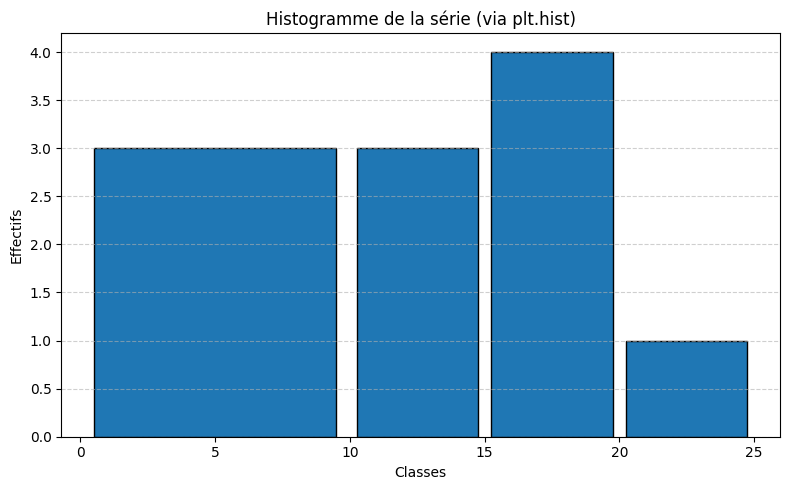

In [142]:
X = np.array([4, 6, 7, 10, 11, 13, 15, 16, 17, 19, 22])

# Définition des bornes des classes
classes = [0, 10, 15, 20, 25]

# Tracé de l'histogramme automatiquement
plt.figure(figsize=(8, 5))
plt.hist(X, bins=classes, edgecolor='black', align='mid', rwidth=0.9)

# Titres et légendes
plt.xlabel("Classes")
plt.ylabel("Effectifs")
plt.title("Histogramme de la série (via plt.hist)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

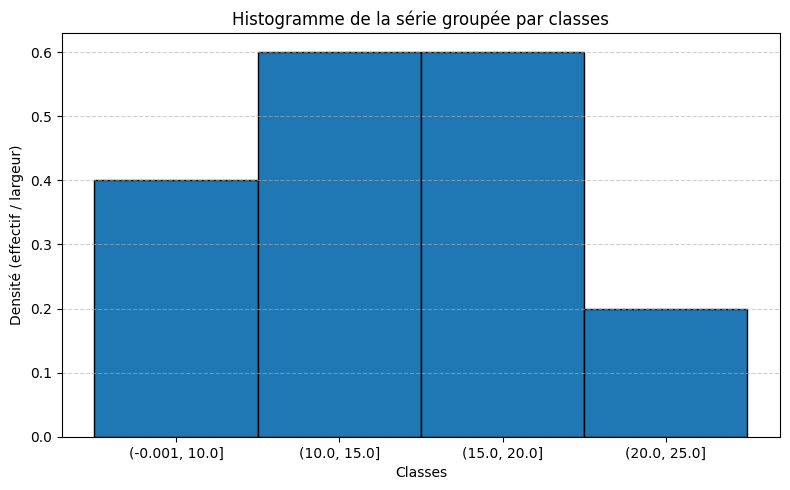

In [143]:
largeurs = np.diff(classes)

# Calcul des hauteurs (effectif / largeur)
hauteurs = effectifs.values / largeurs

# Tracé de l'histogramme
plt.figure(figsize=(8, 5))
plt.bar(range(len(effectifs)), hauteurs, width=1, align='center', edgecolor='black')

# Étiquettes des classes en abscisse
plt.xticks(ticks=range(len(effectifs)), labels=[str(cl) for cl in effectifs.index])

# Titres et légendes
plt.xlabel("Classes")
plt.ylabel("Densité (effectif / largeur)")
plt.title("Histogramme de la série groupée par classes")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Moyenne d'une série statistique

Soit une série statistique :

$$
X = [x_1, x_2, \ldots, x_n]
$$

La **moyenne empirique** (ou arithmétique) de cette série est donnée par la formule :

$$
\bar{x} = \frac{1}{n} (x_1 + x_2 + \cdots + x_n)
$$

---

### Moyenne pondérée

Lorsque les données sont regroupées par **modalités** :

$$
M = [m_1, m_2, \ldots, m_k]
$$

et que :

* $n_i$ est l’**effectif** associé à la modalité $m_i$
* $f_i = \dfrac{n_i}{n}$ est sa **fréquence**

Alors, la **moyenne pondérée** s’écrit :

$$
\bar{x} = \frac{1}{n}(n_1 m_1 + n_2 m_2 + \cdots + n_k m_k) = f_1 m_1 + f_2 m_2 + \cdots + f_k m_k
$$


In [144]:
X = np.array([12, 15, 8, 17, 10, 14])

# Moyenne empirique
moyenne = np.mean(X)

print("Série :", X)
print("Moyenne :", moyenne)

Série : [12 15  8 17 10 14]
Moyenne : 12.666666666666666


In [145]:
modalites = np.array([10, 12, 14])

# Effectifs associés à chaque modalité
effectifs = np.array([2, 3, 5])  # Exemple : 2 notes de 10, 3 notes de 12, 5 notes de 14

# Moyenne pondérée (PAS EXIGIBLE !!!!!)
moyenne_ponderee = np.average(modalites, weights=effectifs)

print("Modalités :", modalites)
print("Effectifs :", effectifs)
print("Moyenne pondérée :", moyenne_ponderee)

def moyenne_ponderee(valeurs, coefficients):
    return np.sum(valeurs * coefficients) / np.sum(coefficients)

# Utilisation de la fonction
moyenne_perso = moyenne_ponderee(effectifs, modalites)

print("Moyenne pondérée (fonction custom) :", moyenne_perso)

Modalités : [10 12 14]
Effectifs : [2 3 5]
Moyenne pondérée : 12.6
Moyenne pondérée (fonction custom) : 3.5


In [146]:
x = np.array([
    [10, 12, 14, 16],
    [8, 10, 12, 14],
    [9, 11, 13, 15]
])

# Moyenne par colonne (valeurs pour chaque "position" dans les séries)
moyennes_colonnes = np.mean(x, axis=0)

# Moyenne par ligne (moyenne de chaque série)
moyennes_lignes = np.mean(x, axis=1)

print("Matrice x :\n", x)
print("Moyenne par colonne :", moyennes_colonnes)
print("Moyenne par ligne   :", moyennes_lignes)

Matrice x :
 [[10 12 14 16]
 [ 8 10 12 14]
 [ 9 11 13 15]]
Moyenne par colonne : [ 9. 11. 13. 15.]
Moyenne par ligne   : [13. 11. 12.]


### Écart-type empirique $\sigma_{n-1}$

Soit une série statistique :

$$
X = [x_1, x_2, \ldots, x_n], \quad n \geq 2
$$

* La **moyenne empirique** est notée :

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$

* L’**écart-type empirique** $\sigma_{n-1}$ (avec correction de Bessel) est :

$$
\sigma_{n-1} = \sqrt{ \frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x})^2 }
$$

C’est cette version qu’utilisent `numpy` et `pandas` **avec** `ddof = 1` (*degrees of freedom*).

---

#### Remarque :

Si on omet `ddof = 1`, on obtient l’estimation non corrigée :

$$
\sigma_n = \sqrt{ \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2 }
$$

Cette version est acceptable si l’effectif $n$ est **très grand**.


In [148]:
X = np.array([10, 12, 13, 15, 9])

# Moyenne avec NumPy
moyenne = np.mean(X)

# Écart-type corrigé (ddof=1) avec NumPy
ecart_type_corrige = np.std(X, ddof=1)

# Écart-type non corrigé (ddof=0) avec NumPy
ecart_type_non_corrige = np.std(X)

print("=== NumPy ===")
print("Données :", X)
print("Moyenne :", moyenne)
print("Écart-type corrigé (σn-1) :", ecart_type_corrige)
print("Écart-type non corrigé (σn) :", ecart_type_non_corrige)

# Avec pandas
donnees = pd.Series(X)

print("\n=== pandas ===")
print("Moyenne :", donnees.mean())
print("Écart-type corrigé (par défaut, ddof=1) :", donnees.std())
print("Écart-type non corrigé :", donnees.std(ddof=0))

=== NumPy ===
Données : [10 12 13 15  9]
Moyenne : 11.8
Écart-type corrigé (σn-1) : 2.3874672772626644
Écart-type non corrigé (σn) : 2.1354156504062622

=== pandas ===
Moyenne : 11.8
Écart-type corrigé (par défaut, ddof=1) : 2.3874672772626644
Écart-type non corrigé : 2.1354156504062622
